In [61]:
import tensorflow as tf
import pandas as pd

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from fastai import*

In [32]:
imagenet= pd.read_csv('https://raw.githubusercontent.com/fastai/imagenette/master/noisy_imagenette.csv')
imagenet

,path,noisy_labels_0,noisy_labels_1,noisy_labels_5,noisy_labels_25,noisy_labels_50,is_valid
0,train/n02979186/n02979186_9036.JPEG,n02979186,n02979186,n02979186,n02979186,n02979186,False
1,train/n02979186/n02979186_11957.JPEG,n02979186,n02979186,n02979186,n02979186,n03000684,False
2,train/n02979186/n02979186_9715.JPEG,n02979186,n02979186,n02979186,n03417042,n03000684,False
3,train/n02979186/n02979186_21736.JPEG,n02979186,n02979186,n02979186,n02979186,n03417042,False
4,train/n02979186/ILSVRC2012_val_00046953.JPEG,n02979186,n02979186,n02979186,n02979186,n03394916,False
...,...,...,...,...,...,...,...
13389,val/n03425413/n03425413_17521.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True
13390,val/n03425413/n03425413_20711.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True
13391,val/n03425413/n03425413_19050.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True
13392,val/n03425413/n03425413_13831.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True


In [33]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

_input = Input((224,224,1)) 

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)

In [22]:
print(tf.__version__)

2.3.0


In [34]:
## PreTrained Model : VGG16¶
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 

In [35]:
img1 = "alexander-london-mJaD10XeD7w-unsplash.jpg"
img2 = "marliese-streefland-2l0CWTpcChI-unsplash.jpg"
img3 = "aaron-burden-2IzoIHBgYAo-unsplash.jpg"
img4 = "mockup-graphics-Kl3467edwsE-unsplash.jpg"
imgs = [img1, img2, img3, img4]

def _load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def _get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))
    plt.show()
    
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()

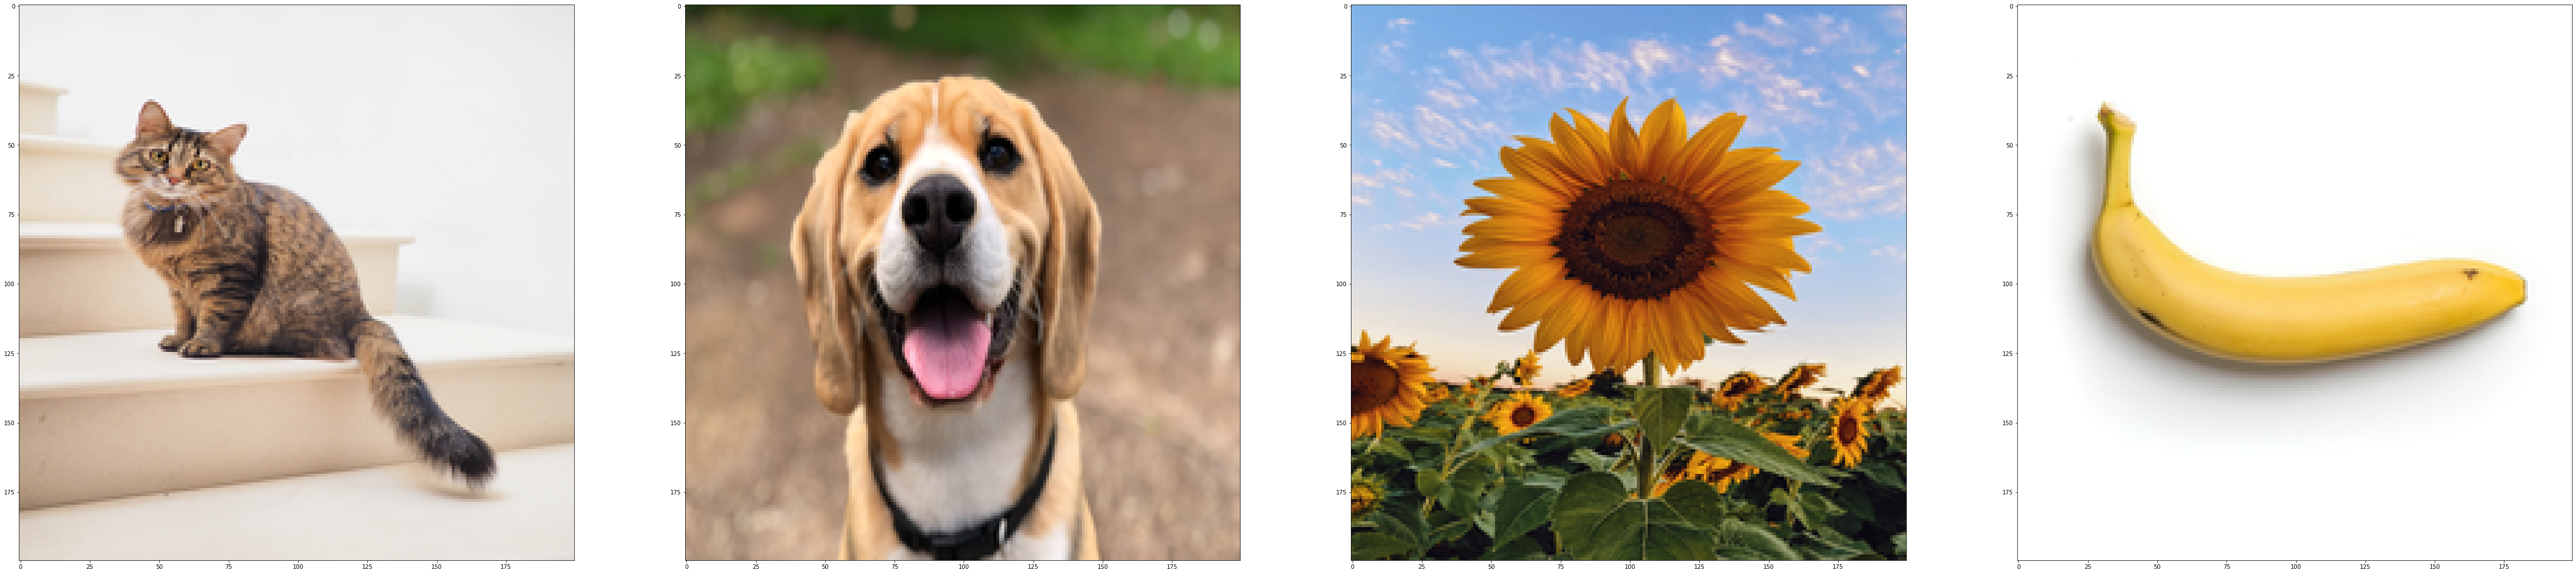

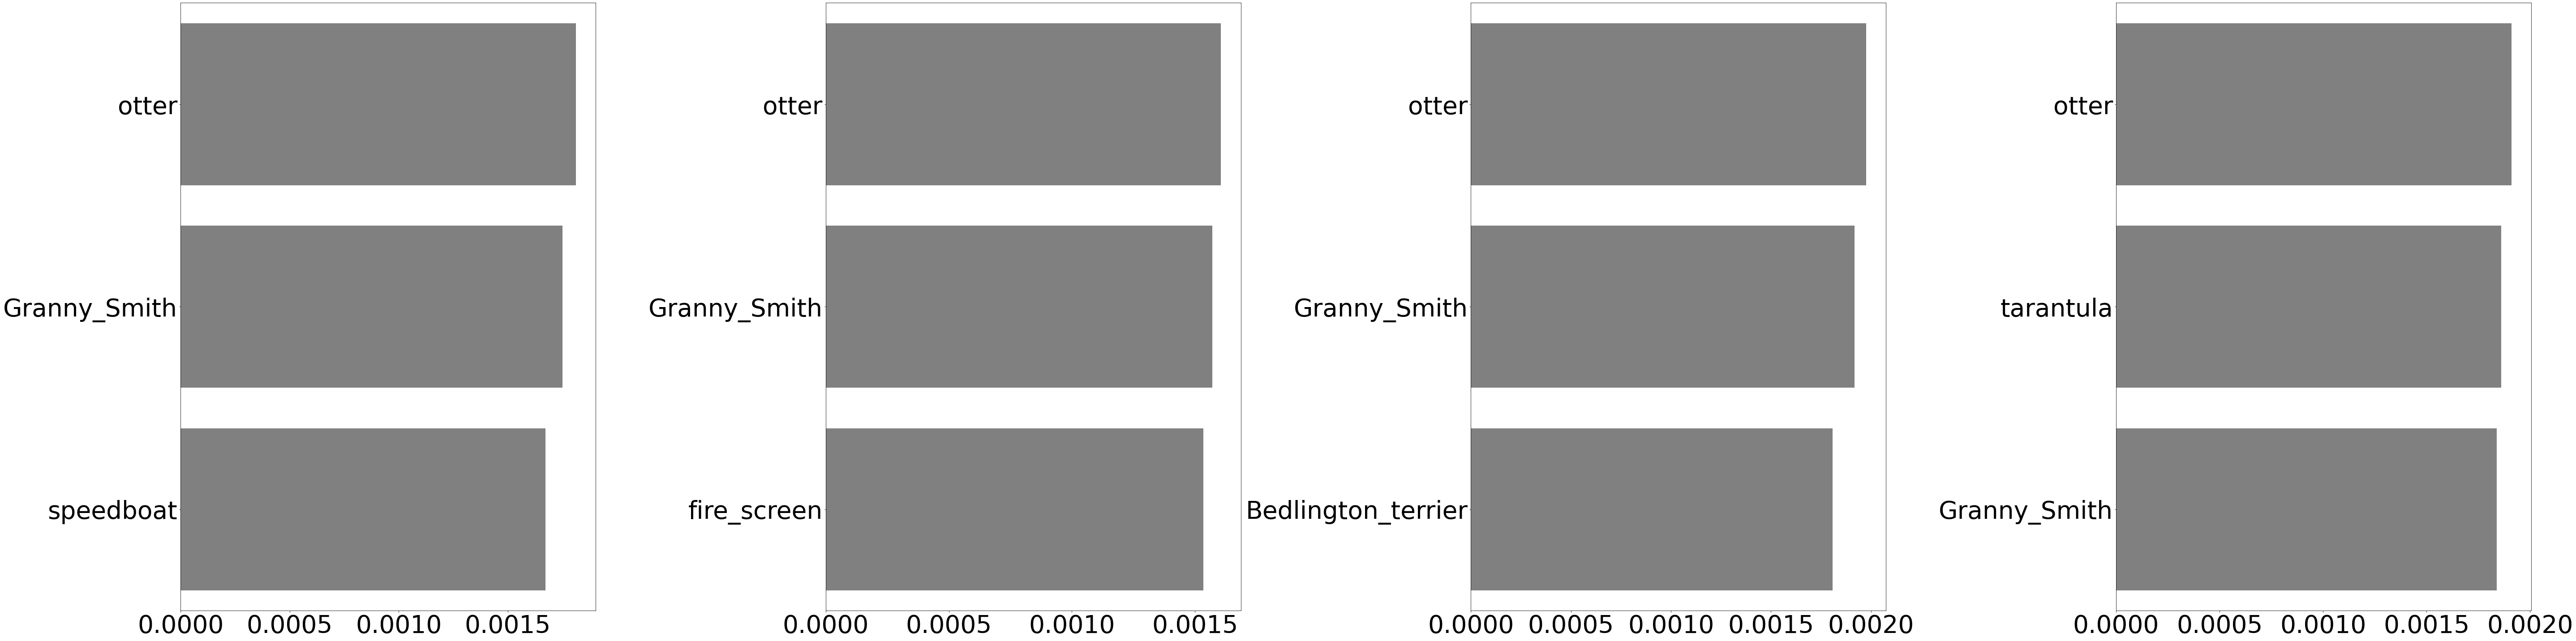

In [36]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16_weights = None
vgg16_model = VGG16(weights=vgg16_weights)
_get_predictions(vgg16_model)


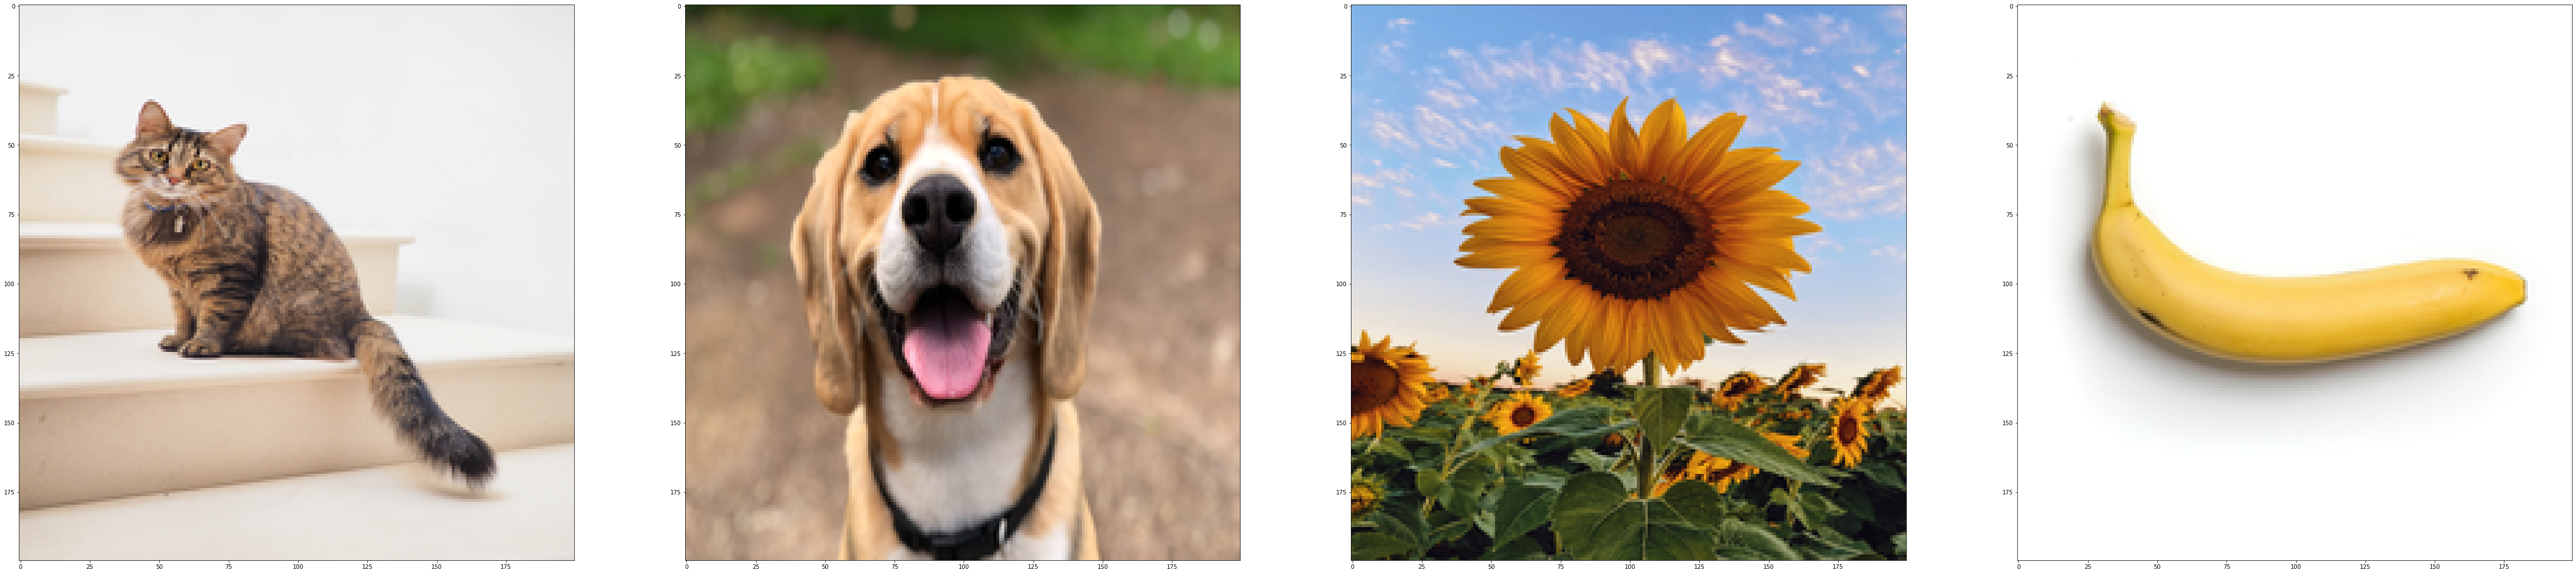

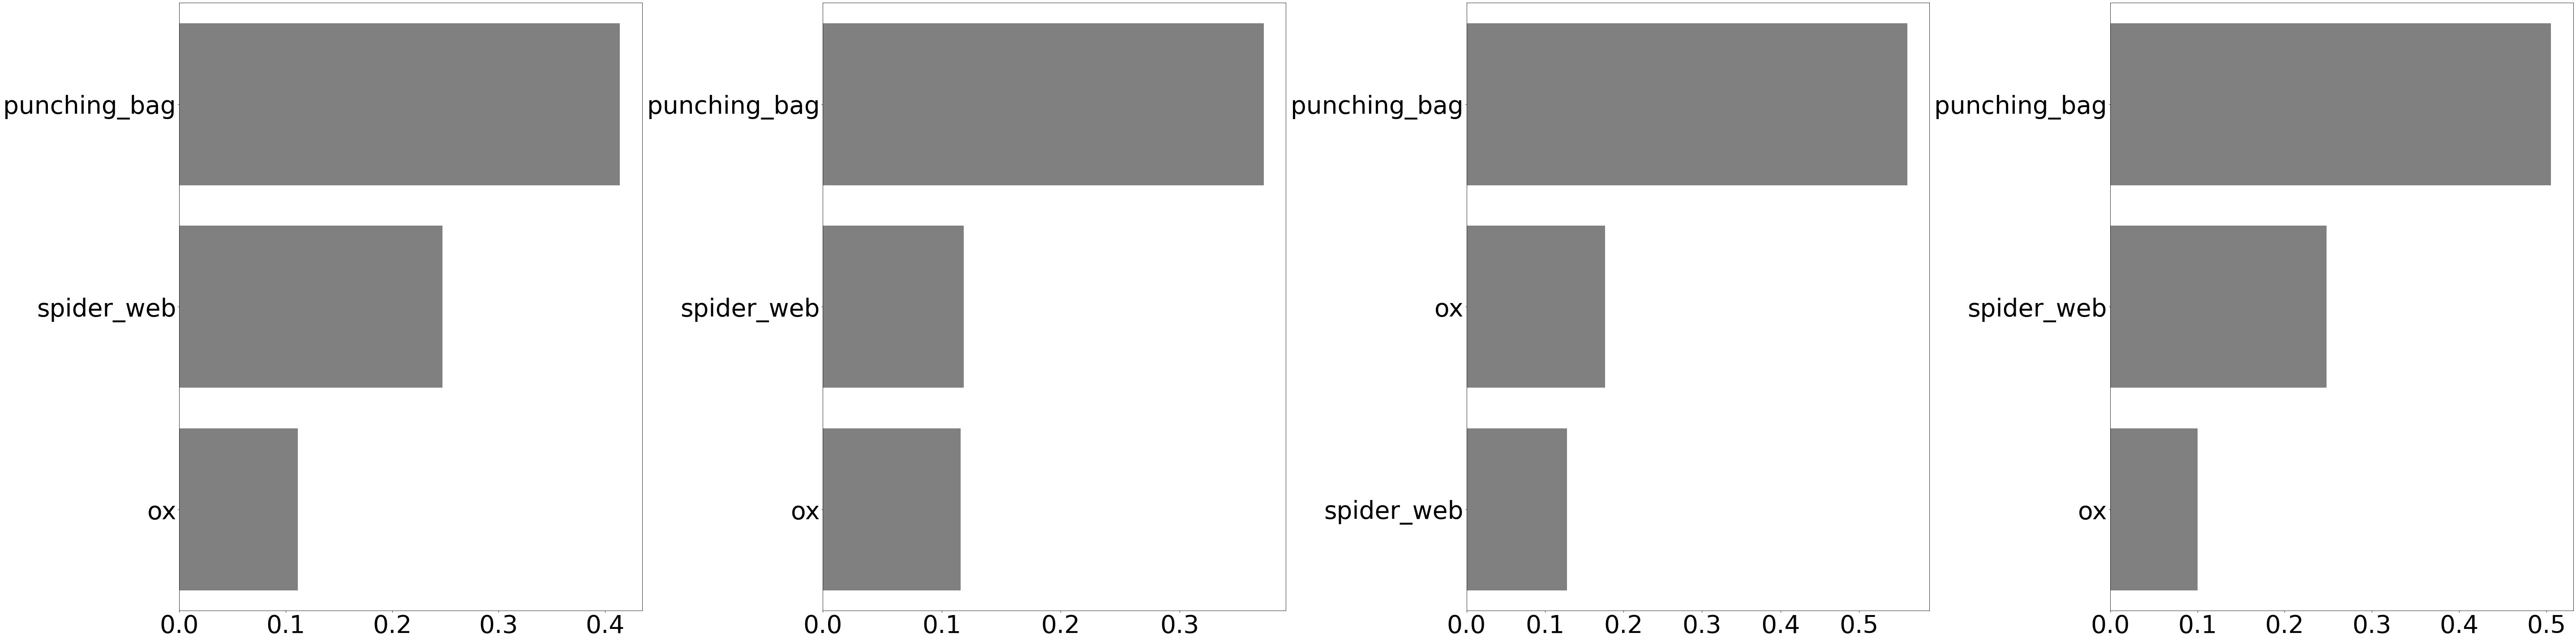

In [37]:
## Resnet
from tensorflow.keras.applications.resnet50 import ResNet50
resnet_weights = None
resnet_model = ResNet50(weights=resnet_weights)
_get_predictions(resnet_model)

In [38]:
## Exception Nets
from tensorflow.keras.applications.xception import Xception
xception_weights = None
xception_model = Xception(weights=xception_weights)

In [55]:
resnet50 = ResNet50(weights=None, include_top=False)
resnet50

In [40]:
def _get_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    resnet_features = resnet50.predict(img_data)
    return resnet_features

img_path = "marliese-streefland-2l0CWTpcChI-unsplash.jpg"
resnet_features = _get_features(img_path)

In [65]:
basepath = untar_data(URLs.IMAGENETTE_160)
class1 = os.listdir(basepath1 + "banana")
class2 = os.listdir(basepath2 + "strawberry")

data = {'mockup-graphics-Kl3467edwsE-unsplash.jpg': class1[:10], 
        'alexander-london-mJaD10XeD7w-unsplash.jpg': class2[:10], 
            'test': [class1[11], class2[11]]}

NameError: name 'untar_data' is not defined

In [66]:
features = {"banana" : [], "strawberry" : [], "test" : []}
testimgs = []
for label, val in data.items():
    for k, each in enumerate(val):        
        if label == "test" and k == 0:
            img_path = basepath + "/Banana/" + each
            testimgs.append(img_path)
        elif label == "test" and k == 1:
            img_path = basepath + "/Strawberry/" + each
            testimgs.append(img_path)
        else: 
            img_path = basepath + label.title() + "/" + each
        feats = _get_features(img_path)
        features[label].append(feats.flatten())  

NameError: name 'data' is not defined

In [46]:
def _get_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    resnet_features = resnet50.predict(img_data)
    return resnet_features

img_path = "marliese-streefland-2l0CWTpcChI-unsplash.jpg"
resnet_features = _get_features(img_path)

In [47]:
features_representation_1 = resnet_features.flatten()
features_representation_2 = resnet_features.squeeze()

print ("Shape 1: ", features_representation_1.shape)
print ("Shape 2: ", features_representation_2.shape)

Shape 1:  (100352,)
Shape 2:  (7, 7, 2048)


In [49]:
dataset = pd.DataFrame()
for label, feats in features.items():
    temp_df = pd.DataFrame(feats)
    temp_df['label'] = label
    dataset = dataset.append(temp_df, ignore_index=True)
dataset.head()

,label


In [51]:
y = dataset[dataset.label != 'test'].label
X = dataset[dataset.label != 'test'].drop('label', axis=1)

In [53]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

model = MLPClassifier(hidden_layer_sizes=(100, 10))
pipeline = Pipeline([('low_variance_filter', VarianceThreshold()), ('model', model)])
pipeline.fit(X, y)

print ("Model Trained on pre-trained features")

ValueError: at least one array or dtype is required

In [54]:
preds = pipeline.predict(features['test'])

f, ax = plt.subplots(1, 2)
for i in range(2):
    ax[i].imshow(Image.open(testimgs[i]).resize((200, 200), Image.ANTIALIAS))
    ax[i].text(10, 180, 'Predicted: %s' % preds[i], color='k', backgroundcolor='red', alpha=0.8)
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.